In [1]:

import librosa
import librosa.display
import matplotlib.pyplot as plt
import numpy as np
import IPython.display as ipd


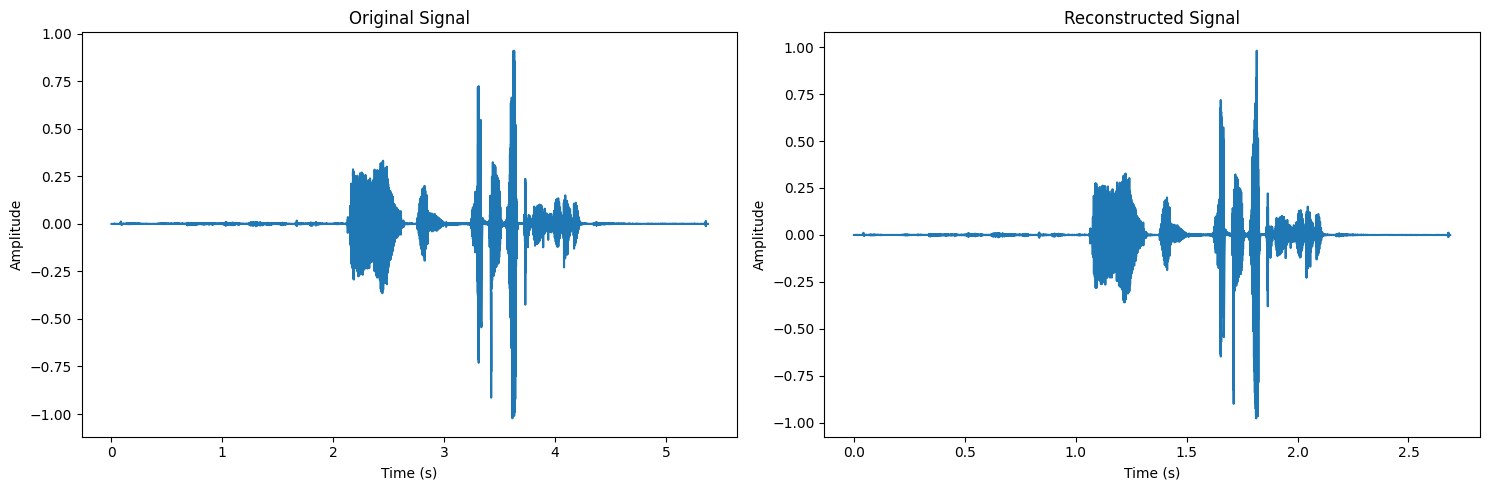

In [4]:

audio_data, sampling_rate = librosa.load("Siddartha.wav")


fft_result = np.fft.fft(audio_data)
positive_freqs = fft_result[:len(fft_result) // 2] 


time_domain_signal = np.fft.ifft(positive_freqs)


plt.figure(figsize=(15, 5))

plt.subplot(1, 2, 1)
plt.plot(np.linspace(0, len(audio_data) / sampling_rate, len(audio_data)), audio_data)
plt.xlabel("Time (s)")
plt.ylabel("Amplitude")
plt.title("Original Signal")

plt.subplot(1, 2, 2)
plt.plot(np.linspace(0, len(time_domain_signal) / sampling_rate, len(time_domain_signal)), time_domain_signal.real)
plt.xlabel("Time (s)")
plt.ylabel("Amplitude")
plt.title("Reconstructed Signal")

plt.tight_layout()
plt.show()

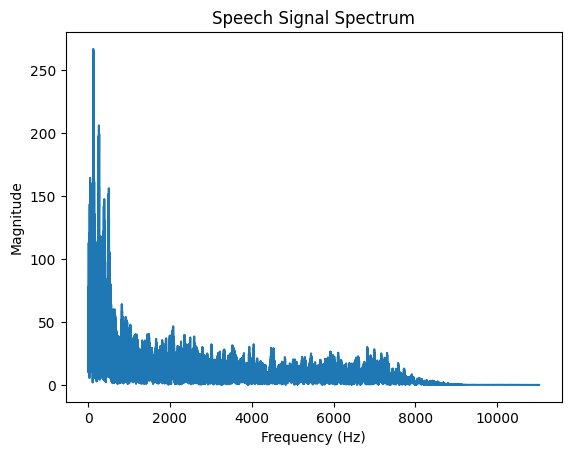

In [6]:
import librosa
import numpy as np
import matplotlib.pyplot as plt

audio_data, sampling_rate = librosa.load("Siddartha.wav")

fft_result = np.fft.fft(audio_data)
positive_freqs = fft_result[:len(fft_result) // 2]  

magnitude_spectrum = np.abs(positive_freqs)

frequency_axis = np.linspace(0, sampling_rate / 2, len(positive_freqs))  

plt.plot(frequency_axis, magnitude_spectrum)
plt.xlabel("Frequency (Hz)")
plt.ylabel("Magnitude")
plt.title("Speech Signal Spectrum")
plt.show()